<a href="https://colab.research.google.com/github/mkbahk/QuantumComputing/blob/main/IonQ_%ED%95%98%EB%93%9C%EC%9B%A8%EC%96%B4%ED%8A%B9%EC%A7%95_Rabi_Flopping.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
!python -m pip install "qiskit-terra>=0.17.4"
!python -m pip install qiskit-aer
!python -m pip install qiskit-ionq

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.9/5.9 MB 43.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 72.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.6/49.6 kB 5.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 110.5/110.5 kB 11.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.6/49.6 kB 4.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 37.5/37.5 MB 15.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 112.7/112.7 kB 12.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.8/12.8 MB 34.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.7/98.7 kB 3.6 MB/s eta 0:00:00
  Attempting uninstall: decorator
    Found existing installation: decorator 4.4.2
    Uninstalling decorator-4.4.2:
      Successfully uninstalled decorator-4.4.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This be

In [8]:
from qiskit import QuantumCircuit, QuantumRegister, Aer, execute
from qiskit.tools.visualization import plot_histogram
from math import pi
import numpy as np

In [9]:
from qiskit_ionq import IonQProvider
ionq_provider = IonQProvider("OiyYG9lEiTNGHJMqBF8GYAn4AIwZX4QV")

# Show all backends:
print(ionq_provider.backends())

[<IonQSimulatorBackend('ionq_simulator')>, <IonQQPUBackend('ionq_qpu')>]


In [ ]:
def get_qc(angle):
  '''Produces a ten-qubit circuit with Rxx gates to applied to every pair of qubits'''
  qr = QuantumRegister(10, 'q')
  qc = QuantumCircuit(qr)

  for i in range(1, 6):
    qc.rxx(i * angle, 2 * (i-1), (2 * (i-1)) + 1)
  ###for
  regurn qc
###def

In [ ]:
qci = get_qc(5 * (pi / 12))
qci.draw()

In [7]:
backend = ionq_provider.get_backend("ionq_simulator")
job = execute(qc, backend)

NameError: ignored

In [ ]:
from qiskit.providers.jobstatus import JobStatus
import time

while job.status() is not JobStatus.DONE:
  print("Job status is", job.status())
  time.sleep(1)
###while

print("Job status is", job.status())

Job status is JobStatus.QUEUED
Job status is JobStatus.DONE


{'0': 793, '1': 231}


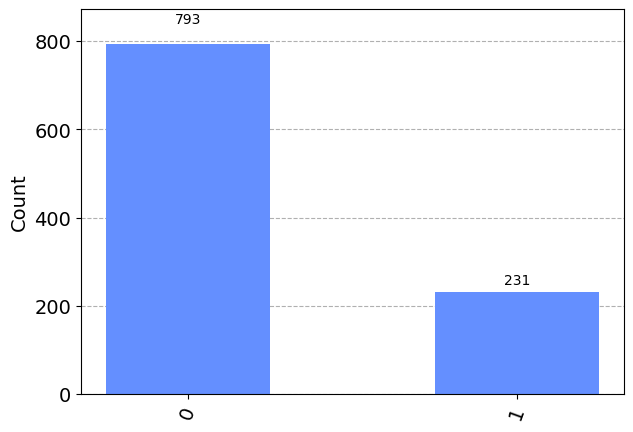

In [ ]:
#result = job.result()
counts = job.result().get_counts()

print(counts)
plot_histogram(counts)